In [1]:
import sys
import os

# Add the project root directory to Python's path
sys.path.append(os.path.abspath('..'))  # Assuming notebooks are one level below root

In [3]:
from src.d2c.data_generation.builder import Builder

import math

ModuleNotFoundError: No module named 'CausalPlayground'

In [6]:
builder = Builder(
    observations=250,  # number of observations per dataset
    n_variables_exo=2,  # number of exogenous variables
    n_variables_endo=4,  # number of endogenous variables
    functions_to_use=[
            "linear",
            "polynomial",
            "sigmoid",
            "nonlinear",
            "interaction",
        ],  # functions to generate the data
    functions_kwargs={
        "polynomial": [[1, 2], [2, 3]],  # arguments for the functions
        'nonlinear': [math.sin, math.tanh, math.exp],
    },  # arguments for the functions
    datasets_per_function=40,  # number of datasets to generate per function
    noise_std=0.2,  # standard deviation of noise
    seed=123  # seed for reproducibility
)

# Step 2: Generate the datasets and DAGs
builder.build()


In [1]:
print(math.sin)

NameError: name 'math' is not defined

In [7]:
# we can check one of the generated dataset
builder.get_generated_observations()['linear'][0]

X0        X1        X2        X3        U0        U1
0    0.654683  2.281338  0.791098  1.608815  0.692910  0.483587
1    1.119768  2.612755  1.353092  2.751712  0.148079  0.827126
2    0.365485  1.050956  0.441640  0.898141  0.207741  0.269969
3    0.684501  2.453571  0.827129  1.682089  0.779432  0.505612
4    1.239587  2.854988  1.497877  3.046154  0.133887  0.915631
..        ...       ...       ...       ...       ...       ...
245  0.795244  2.196936  0.960948  1.954229  0.379782  0.587414
246  1.318044  3.019294  1.592683  3.238955  0.129172  0.973585
247  0.691885  2.316482  0.836052  1.700234  0.656275  0.511067
248  0.661273  2.377423  0.799061  1.625008  0.758704  0.488455
249  1.293114  3.980835  1.562558  3.177692  0.946138  0.955170

[250 rows x 6 columns]

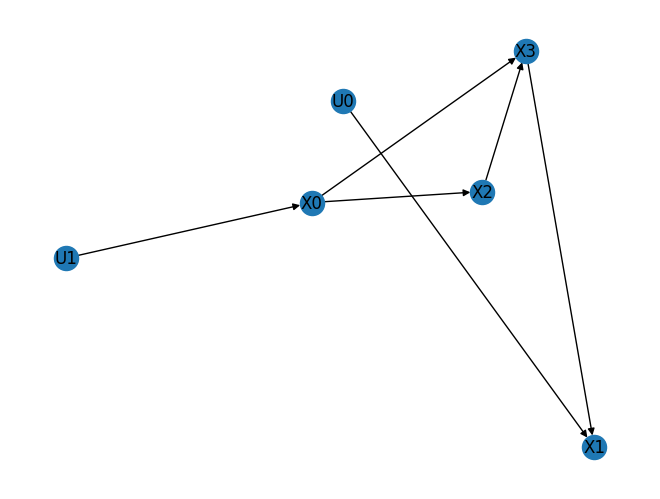

In [8]:
# we can check one of the generated dags
import networkx as nx
dag = builder.get_generated_dags()['linear'][0]
nx.draw(dag, with_labels=True)

In [9]:
builder.to_pickle('example/synthetic_data.pkl')